In [23]:
from sqlalchemy import create_engine
from sqlalchemy import inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.dates as mdates

import seaborn as sns
from sklearn import datasets

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

import googlemaps
from datetime import datetime

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1)

## Querying from that database into Python

#### 1. Connect Python to mta database

In [24]:
engine = create_engine("sqlite:///mta_data.db")
insp = inspect(engine)
print(insp.get_table_names())

['mta_data']


In [25]:
data = pd.read_sql('PRAGMA table_info(mta_data)', engine);
if "C/A" in data.name:
    # update column name from C/A to CA
    conn =  engine.connect()
    conn.execute('ALTER TABLE mta_data RENAME COLUMN "C/A" TO "CA"')
else:
    print("No need to update")

No need to update


#### 2. Explore the Database
   - Querying from that database into Python via SQLAlchemy is required

In [26]:
mta_data = pd.read_sql('SELECT * FROM mta_data order by DATE ASC limit 10;', engine)
mta_data

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,20:00:00,REGULAR,7561578,2583031
6,A002,R051,02-00-01,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,6698358,1523748
7,A002,R051,02-00-01,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,6698362,1523749
8,A002,R051,02-00-01,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,6698370,1523761
9,A002,R051,02-00-01,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,6698405,1523790


In [27]:
# check if the data is collected within 
mta_data = pd.read_sql('SELECt COUNT(DISTINCT DATE) FROM mta_data order by DATE ASC;', engine)
mta_data

,COUNT(DISTINCT DATE)
0,140


In [28]:
mta_data = pd.read_sql('select count(*) from mta_data', engine)
mta_data

,count(*)
0,4187239


In [29]:
mta_data = pd.read_sql('SELECT * FROM mta_data order by ENTRIES desc;', engine)
mta_data.head(10)


,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,J003,R352,00-00-00,HEWES ST,JM,BMT,04/24/2021,01:00:00,REGULAR,2147429816,671147622
1,J003,R352,00-00-00,HEWES ST,JM,BMT,04/24/2021,05:00:00,REGULAR,2147429813,671147623
2,J003,R352,00-00-00,HEWES ST,JM,BMT,04/24/2021,09:00:00,REGULAR,2147429789,671147631
3,J003,R352,00-00-00,HEWES ST,JM,BMT,04/24/2021,13:00:00,REGULAR,2147429724,671147646
4,J003,R352,00-00-00,HEWES ST,JM,BMT,04/24/2021,17:00:00,REGULAR,2147429654,671147677
5,J003,R352,00-00-00,HEWES ST,JM,BMT,04/24/2021,21:00:00,REGULAR,2147429588,671147700
6,J003,R352,00-00-00,HEWES ST,JM,BMT,04/25/2021,01:00:00,REGULAR,2147429567,671147707
7,J003,R352,00-00-00,HEWES ST,JM,BMT,04/25/2021,05:00:00,REGULAR,2147429563,671147714
8,J003,R352,00-00-00,HEWES ST,JM,BMT,04/25/2021,09:00:00,REGULAR,2147429544,671147731
9,J003,R352,00-00-00,HEWES ST,JM,BMT,04/25/2021,13:00:00,REGULAR,2147429516,671147757


In [30]:
mta_data.tail(10)


,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
4187229,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/29/2021,08:00:00,REGULAR,0,14
4187230,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/29/2021,12:00:00,REGULAR,0,14
4187231,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/29/2021,16:00:00,REGULAR,0,14
4187232,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/29/2021,20:00:00,REGULAR,0,14
4187233,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/30/2021,00:00:00,REGULAR,0,14
4187234,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/30/2021,04:00:00,REGULAR,0,14
4187235,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/30/2021,08:00:00,REGULAR,0,14
4187236,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/30/2021,12:00:00,REGULAR,0,14
4187237,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/30/2021,16:00:00,REGULAR,0,14
4187238,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/30/2021,20:00:00,REGULAR,0,14


In [31]:
mta_data = pd.read_sql('select * from mta_data where ENTRIES==0; ', engine)
mta_data.head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/04/2021,00:00:00,REGULAR,0,910
1,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/04/2021,04:00:00,REGULAR,0,910
2,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/04/2021,08:00:00,REGULAR,0,910
3,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/04/2021,12:00:00,REGULAR,0,910
4,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/04/2021,16:00:00,REGULAR,0,910
5,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/04/2021,20:00:00,REGULAR,0,910
6,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/05/2021,00:00:00,REGULAR,0,910
7,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/05/2021,04:00:00,REGULAR,0,910
8,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/05/2021,08:00:00,REGULAR,0,910
9,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/05/2021,12:00:00,REGULAR,0,910


- The entries shows 0 and exits shows 910 - abnormal.. but the goal of the analysis is to find the stations/turnstiles with the most crowd in entrance. we ignore the abnormal issue here 


In [32]:
mta_data = pd.read_sql('select * from mta_data where EXITS==0; ', engine)
mta_data.head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/04/2021,00:00:00,REGULAR,524476,0
1,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/04/2021,04:00:00,REGULAR,524476,0
2,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/04/2021,08:00:00,REGULAR,524476,0
3,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/04/2021,12:00:00,REGULAR,524476,0
4,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/04/2021,16:00:00,REGULAR,524476,0
5,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/04/2021,20:00:00,REGULAR,524476,0
6,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/05/2021,00:00:00,REGULAR,524476,0
7,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/05/2021,04:00:00,REGULAR,524477,0
8,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/05/2021,08:00:00,REGULAR,524477,0
9,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/05/2021,12:00:00,REGULAR,524477,0


In [33]:
mta_data = pd.read_sql('select count(*) from mta_data where EXITS==0 and ENTRIES> 1000; ', engine)
mta_data.head(10)

,count(*)
0,119197


#### Issue observed
- The exits shows 0 but entries shows larger than 1,000 - abnormal.. maybe the station shut down for unknow issue?
- there are 119197 records with this problem. not sure about the reason, 
- for the further analysis, we may look into the analysis result from (1) with these abnormal data (2) without these abnormal data to check the differences


In [34]:
# check the turnstiles with top (max) 5 records in each day

mta_data = pd.read_sql('SELECT *, COUNT(*) FROM mta_data GROUP BY CA, UNIT, SCP, DATE HAVING COUNT(*) IN \
(SELECT MAX(c) FROM (SELECT distinct COUNT(ENTRIES) AS c FROM mta_data GROUP BY  CA, UNIT, SCP, DATE order by c desc));', engine)
mta_data.head()



,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,COUNT(*)
0,N110,R283,00-00-00,LAFAYETTE AV,C,IND,07/02/2021,01:00:00,REGULAR,19045,25148,55
1,N110,R283,00-00-01,LAFAYETTE AV,C,IND,07/02/2021,01:00:00,REGULAR,5308,8176,55
2,N110,R283,00-00-02,LAFAYETTE AV,C,IND,07/02/2021,01:00:00,REGULAR,1176925,2248870,55
3,N110,R283,00-03-00,LAFAYETTE AV,C,IND,07/02/2021,01:00:00,REGULAR,502859,1771856,55
4,N110,R283,00-03-01,LAFAYETTE AV,C,IND,07/02/2021,01:00:00,REGULAR,1057467,810958,55


In [35]:
# check total number of turnstiles each date
mta_data = pd.read_sql("SELECT *, count(*) FROM mta_data group by CA, UNIT, SCP, DATE order by DATE asc;", engine)
mta_data.head(20)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,count(*)
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898,6
1,A002,R051,02-00-01,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,6698358,1523748,6
2,A002,R051,02-03-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,1426009,5385019,6
3,A002,R051,02-03-01,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,1580988,2464894,6
4,A002,R051,02-03-02,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,13350,17213,6
5,A002,R051,02-03-03,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,6141463,6991882,6
6,A002,R051,02-03-04,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7560411,3903296,6
7,A002,R051,02-03-05,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,12140284,1463972,6
8,A002,R051,02-03-06,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,9465498,514843,6
9,A002,R051,02-05-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,524429,0,6


In [36]:
mta_dataset=pd.read_sql("select * from mta_data where DATE BETWEEN '05-01-2021' AND '09-01-2021';", engine)
mta_dataset.head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,00:00:00,REGULAR,7625998,2609113
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,04:00:00,REGULAR,7626014,2609117
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,08:00:00,REGULAR,7626024,2609135
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,12:00:00,REGULAR,7626086,2609191
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,16:00:00,REGULAR,7626206,2609221
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,20:00:00,REGULAR,7626348,2609238
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2021,00:00:00,REGULAR,7626446,2609254
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2021,04:00:00,REGULAR,7626452,2609259
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2021,08:00:00,REGULAR,7626464,2609272
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2021,12:00:00,REGULAR,7626508,2609309


In [37]:
mta_dataset.ENTRIES.count()

3679429

In [38]:
mta_dataset.DATE.nunique()

123

In [39]:
mta_dataset.DATE.sort_values().head(5)

3616662    05/01/2021
3564201    05/01/2021
3564202    05/01/2021
3564203    05/01/2021
3564204    05/01/2021
Name: DATE, dtype: object

In [40]:
mta_dataset.DATE.sort_values().tail(5)

21901    08/31/2021
21902    08/31/2021
21903    08/31/2021
72265    08/31/2021
71140    08/31/2021
Name: DATE, dtype: object

In [142]:
# copy the retrived mta for pandas analysis
mta_dfs = mta_dataset

## Exploratory data analysis in pandas 

In [143]:
# explore the data
mta_dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3679348 entries, 120377 to 3470254
Data columns (total 12 columns):
 #   Column    Dtype         
---  ------    -----         
 0   CA        object        
 1   UNIT      object        
 2   SCP       object        
 3   STATION   object        
 4   LINENAME  object        
 5   DIVISION  object        
 6   DATE      object        
 7   TIME      object        
 8   DESC      object        
 9   ENTRIES   int64         
 10  EXITS     int64         
 11  DATETIME  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 493.9+ MB


In [144]:
# check column format
mta_dfs.columns

Index(['CA', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATETIME'],
      dtype='object')

In [145]:
mta_dfs.STATION.value_counts(ascending = False)

34 ST-PENN STA     75034
FULTON ST          70783
GRD CNTRL-42 ST    65525
23 ST              53858
86 ST              48106
                   ...  
SHEPHERD AV         2204
PRESIDENT ST        2199
182-183 STS         2197
SUTTER AV           1476
CLEVELAND ST        1474
Name: STATION, Length: 379, dtype: int64

In [146]:
mta_dfs.dtypes

CA                  object
UNIT                object
SCP                 object
STATION             object
LINENAME            object
DIVISION            object
DATE                object
TIME                object
DESC                object
ENTRIES              int64
EXITS                int64
DATETIME    datetime64[ns]
dtype: object

In [147]:
#detect empty value
mta_dfs.isna().sum()

CA          0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
DATETIME    0
dtype: int64

In [148]:
import datetime

In [149]:
# Take the date and time fields into a single datetime column
mta_dfs["DATETIME"] = pd.to_datetime(mta_dfs.DATE+" "+ mta_dfs.TIME, format="%m/%d/%Y %H:%M:%S")

mta_dfs.head(5)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
120377,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,21:00:00,REGULAR,5554,616,2021-08-31 21:00:00
120376,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,17:00:00,REGULAR,5554,616,2021-08-31 17:00:00
120375,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,13:00:00,RECOVR AUD,5554,616,2021-08-31 13:00:00
120374,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,09:00:00,REGULAR,5554,616,2021-08-31 09:00:00
120373,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,05:00:00,REGULAR,5554,616,2021-08-31 05:00:00


In [150]:
mta_dfs.dtypes

CA                  object
UNIT                object
SCP                 object
STATION             object
LINENAME            object
DIVISION            object
DATE                object
TIME                object
DESC                object
ENTRIES              int64
EXITS                int64
DATETIME    datetime64[ns]
dtype: object

In [151]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(mta_dfs
.groupby(["CA", "UNIT","SCP", "STATION", "DATETIME"])
.ENTRIES.count()
.reset_index()
.sort_values("ENTRIES", ascending=False)).head(5)

,CA,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-05-01 00:00:00,1
2452974,R138,R293,00-03-04,34 ST-PENN STA,2021-07-21 10:00:00,1
2452892,R138,R293,00-03-04,34 ST-PENN STA,2021-07-07 18:00:00,1
2452893,R138,R293,00-03-04,34 ST-PENN STA,2021-07-07 22:00:00,1
2452894,R138,R293,00-03-04,34 ST-PENN STA,2021-07-08 02:00:00,1


In [152]:
#check on record with duplicate entries in the same datetime

mask = ((mta_dfs["CA"]=="R514") &
       (mta_dfs["UNIT"]=="R094") &
        (mta_dfs["SCP"] =="00-05-00") &
       (mta_dfs["DATETIME"].dt.date == datetime.datetime(2021, 7, 22).date()))

mta_dfs[mask]

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
1355460,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,20:00:00,REGULAR,262243,0,2021-07-22 20:00:00
1355459,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,16:00:00,REGULAR,262243,0,2021-07-22 16:00:00
1355457,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,12:00:00,REGULAR,3,0,2021-07-22 12:00:00
1355455,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,08:00:00,REGULAR,3,0,2021-07-22 08:00:00
1355454,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,07:40:57,REGULAR,3,0,2021-07-22 07:40:57
1355453,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,07:39:19,REGULAR,3,0,2021-07-22 07:39:19
1355451,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,04:00:00,REGULAR,3,0,2021-07-22 04:00:00
1355449,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,00:00:00,REGULAR,3,0,2021-07-22 00:00:00


In [153]:
mask = ((mta_dfs["CA"]=="R514") &
       (mta_dfs["UNIT"]=="R094") &
        (mta_dfs["SCP"] =="00-05-00") &
       (mta_dfs["DATETIME"].dt.date == datetime.datetime(2021, 7, 21).date()))

mta_dfs[mask]

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
1355448,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/21/2021,20:00:00,REGULAR,3,0,2021-07-21 20:00:00
1355447,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/21/2021,16:00:00,REGULAR,3,0,2021-07-21 16:00:00
1355446,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/21/2021,12:00:00,REGULAR,2,0,2021-07-21 12:00:00
1355445,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/21/2021,08:00:00,REGULAR,2,0,2021-07-21 08:00:00
1355444,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/21/2021,04:00:00,REGULAR,2,0,2021-07-21 04:00:00


- From the data in pre_date (07/21), RECOVR AUD seem not correct. Should keep the Regular One for following analysis.

In [154]:
mta_dfs.DESC.value_counts()

REGULAR       3663459
RECOVR AUD      15889
Name: DESC, dtype: int64

In [155]:
# sort the turnstiles data in descending order 
mta_dfs.sort_values(["CA", "UNIT","SCP", "STATION", "DATETIME"], inplace=True, ascending=False)
#drop the the duplicates 
mta_dfs.drop_duplicates(subset=["CA","UNIT","SCP", "STATION", "DATETIME"], inplace=True)

In [156]:
mta_dfs.DESC.value_counts()

REGULAR       3663459
RECOVR AUD      15889
Name: DESC, dtype: int64

In [157]:
# verify if value for subset ["CA","UNIT","SCP", "STATION", "DATETIME"] is unique
(mta_dfs
.groupby( ["CA","UNIT","SCP", "STATION", "DATETIME"])
.ENTRIES.count()
.reset_index()
.sort_values("ENTRIES", ascending = False)).head(5)

,CA,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-05-01 00:00:00,1
2452974,R138,R293,00-03-04,34 ST-PENN STA,2021-07-21 10:00:00,1
2452892,R138,R293,00-03-04,34 ST-PENN STA,2021-07-07 18:00:00,1
2452893,R138,R293,00-03-04,34 ST-PENN STA,2021-07-07 22:00:00,1
2452894,R138,R293,00-03-04,34 ST-PENN STA,2021-07-08 02:00:00,1


- No more duplicate Entries

In [158]:
mta_dfs.head(5)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
120377,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,21:00:00,REGULAR,5554,616,2021-08-31 21:00:00
120376,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,17:00:00,REGULAR,5554,616,2021-08-31 17:00:00
120375,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,13:00:00,RECOVR AUD,5554,616,2021-08-31 13:00:00
120374,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,09:00:00,REGULAR,5554,616,2021-08-31 09:00:00
120373,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,05:00:00,REGULAR,5554,616,2021-08-31 05:00:00


## EDA Data backup
 - dataset used for the further analysis

In [159]:
#backup the half - cleaned data - the duplicates removed & add Datetime
mta_dfs_toProcess = mta_dfs
mta_dfs.to_csv("mta_dfs_toProcess.csv",index=False)

In [160]:
mta_dfs = mta_dfs.drop(["DESC"], axis=1, errors="ignore")


In [161]:
mta_dfs

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME
120377,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,21:00:00,5554,616,2021-08-31 21:00:00
120376,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,17:00:00,5554,616,2021-08-31 17:00:00
120375,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,13:00:00,5554,616,2021-08-31 13:00:00
120374,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,09:00:00,5554,616,2021-08-31 09:00:00
120373,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,05:00:00,5554,616,2021-08-31 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...
3470258,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,16:00:00,7564813,2584498,2021-05-01 16:00:00
3470257,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,12:00:00,7564691,2584460,2021-05-01 12:00:00
3470256,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,08:00:00,7564642,2584394,2021-05-01 08:00:00
3470255,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,04:00:00,7564621,2584372,2021-05-01 04:00:00


- each row represents a turnstile (identified by a combination of the C/A, UNIT, SCP, and STATION columns) at a specific time -- approximately four hours apart. The ENTRIES column represents cumulative entries at that point in time.

In [162]:
mta_dfs[(mta_dfs["CA"]=="A002")&
        (mta_dfs["UNIT"] =="R051") & 
        (mta_dfs["SCP"] =="02-00-00") &
        (mta_dfs["STATION"]=="59 ST") &
         (mta_dfs["DATE"] == "05/01/2021")]


,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME
3470259,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,20:00:00,7564974,2584525,2021-05-01 20:00:00
3470258,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,16:00:00,7564813,2584498,2021-05-01 16:00:00
3470257,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,12:00:00,7564691,2584460,2021-05-01 12:00:00
3470256,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,08:00:00,7564642,2584394,2021-05-01 08:00:00
3470255,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,04:00:00,7564621,2584372,2021-05-01 04:00:00
3470254,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,00:00:00,7564613,2584371,2021-05-01 00:00:00


- The entries is cummulative value. The total entries of the day occur at the last record of the day. Since the mta_dfs is sorted in descending order per group ["CA","UNIT","SCP", "STATION", "DATE"]. We read the last recod of the day (located at the top of the group) using the .first() DataFrame method.

In [163]:
mta_dfs_daily = (mta_dfs
          .groupby(["CA","UNIT","SCP", "STATION", "DATE"], as_index=False)
                 .ENTRIES.first()
                )
mta_dfs_daily.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,05/01/2021,7564974
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964


In [173]:
mta_dfs_daily_2 = (mta_dfs
                      .groupby(["CA", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                      .agg({'ENTRIES':['max'], 'EXITS':['max'], 'LINENAME':['first'], 'DIVISION':['first'], 'DATETIME':['max']}))

In [174]:
mta_dfs_daily_2.dtypes

CA                         object
UNIT                       object
SCP                        object
STATION                    object
DATE                       object
ENTRIES   max               int64
EXITS     max               int64
LINENAME  first            object
DIVISION  first            object
DATETIME  max      datetime64[ns]
dtype: object

In [175]:
mta_dfs_daily_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614215 entries, 0 to 614214
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   (CA, )             614215 non-null  object        
 1   (UNIT, )           614215 non-null  object        
 2   (SCP, )            614215 non-null  object        
 3   (STATION, )        614215 non-null  object        
 4   (DATE, )           614215 non-null  object        
 5   (ENTRIES, max)     614215 non-null  int64         
 6   (EXITS, max)       614215 non-null  int64         
 7   (LINENAME, first)  614215 non-null  object        
 8   (DIVISION, first)  614215 non-null  object        
 9   (DATETIME, max)    614215 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 51.5+ MB


In [176]:
mta_dfs_daily_2.columns = [column[0] for column in mta_dfs_daily_2.columns]

In [177]:
mta_dfs_daily_2.columns

Index(['CA', 'UNIT', 'SCP', 'STATION', 'DATE', 'ENTRIES', 'EXITS', 'LINENAME',
       'DIVISION', 'DATETIME'],
      dtype='object')

In [178]:
mta_dfs_daily_2

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME
0,A002,R051,02-00-00,59 ST,05/01/2021,7564974,2584525,NQR456W,BMT,2021-05-01 20:00:00
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,2584647,NQR456W,BMT,2021-05-02 20:00:00
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,2584893,NQR456W,BMT,2021-05-03 20:00:00
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,2585155,NQR456W,BMT,2021-05-04 20:00:00
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,2585432,NQR456W,BMT,2021-05-05 20:00:00
...,...,...,...,...,...,...,...,...,...,...
614210,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/27/2021,5554,614,R,RIT,2021-08-27 21:00:00
614211,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/28/2021,5554,615,R,RIT,2021-08-28 21:00:00
614212,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/29/2021,5554,616,R,RIT,2021-08-29 21:00:00
614213,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554,616,R,RIT,2021-08-30 21:00:00


In [179]:
mta_dfs_daily_entries = mta_dfs_daily_2.copy()

In [180]:
mta_dfs_daily_entries

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME
0,A002,R051,02-00-00,59 ST,05/01/2021,7564974,2584525,NQR456W,BMT,2021-05-01 20:00:00
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,2584647,NQR456W,BMT,2021-05-02 20:00:00
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,2584893,NQR456W,BMT,2021-05-03 20:00:00
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,2585155,NQR456W,BMT,2021-05-04 20:00:00
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,2585432,NQR456W,BMT,2021-05-05 20:00:00
...,...,...,...,...,...,...,...,...,...,...
614210,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/27/2021,5554,614,R,RIT,2021-08-27 21:00:00
614211,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/28/2021,5554,615,R,RIT,2021-08-28 21:00:00
614212,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/29/2021,5554,616,R,RIT,2021-08-29 21:00:00
614213,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554,616,R,RIT,2021-08-30 21:00:00


### Problem 3b
- Use the daily maximum `ENTRIES` calculations from Problem 3a. Recall that the `ENTRIES` column contains **cumulative entries** on each day. We would now like you to calculate **daily entries**, i.e. the number of new entries gained each day.
- *Hint:* Group the data by turnstile. Check out the `.shift()` (or `.diff()`) DataFrame methods for this purpose. *Ensure things make sense;* you *may* need to use the  `.apply()` method for abnormalities.

In [181]:
mta_dfs_daily_entries

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME
0,A002,R051,02-00-00,59 ST,05/01/2021,7564974,2584525,NQR456W,BMT,2021-05-01 20:00:00
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,2584647,NQR456W,BMT,2021-05-02 20:00:00
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,2584893,NQR456W,BMT,2021-05-03 20:00:00
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,2585155,NQR456W,BMT,2021-05-04 20:00:00
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,2585432,NQR456W,BMT,2021-05-05 20:00:00
...,...,...,...,...,...,...,...,...,...,...
614210,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/27/2021,5554,614,R,RIT,2021-08-27 21:00:00
614211,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/28/2021,5554,615,R,RIT,2021-08-28 21:00:00
614212,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/29/2021,5554,616,R,RIT,2021-08-29 21:00:00
614213,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554,616,R,RIT,2021-08-30 21:00:00


In [184]:
mta_dfs_daily_entries[["PREV_DATE", "PREV_ENTRIES","PREV_EXITS"]] = (mta_dfs_daily_entries
                                                       .groupby(["CA", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES","EXITS"]]
                                                       .shift(1))

In [185]:
mta_dfs_daily_entries

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,05/01/2021,7564974,2584525,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,2584647,NQR456W,BMT,2021-05-02 20:00:00,05/01/2021,7564974.0,2584525.0
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,2584893,NQR456W,BMT,2021-05-03 20:00:00,05/02/2021,7565300.0,2584647.0
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,2585155,NQR456W,BMT,2021-05-04 20:00:00,05/03/2021,7565798.0,2584893.0
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,2585432,NQR456W,BMT,2021-05-05 20:00:00,05/04/2021,7566364.0,2585155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
614210,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/27/2021,5554,614,R,RIT,2021-08-27 21:00:00,08/26/2021,5554.0,614.0
614211,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/28/2021,5554,615,R,RIT,2021-08-28 21:00:00,08/27/2021,5554.0,614.0
614212,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/29/2021,5554,616,R,RIT,2021-08-29 21:00:00,08/28/2021,5554.0,615.0
614213,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554,616,R,RIT,2021-08-30 21:00:00,08/29/2021,5554.0,616.0


In [186]:
mta_dfs_daily_entries[(mta_dfs_daily_entries['PREV_DATE'].isna())].head(10)

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,05/01/2021,7564974,2584525,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN
123,A002,R051,02-00-01,59 ST,05/01/2021,6701149,1524757,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN
246,A002,R051,02-03-00,59 ST,05/01/2021,1427337,5390302,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN
369,A002,R051,02-03-01,59 ST,05/01/2021,1584850,2470649,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN
492,A002,R051,02-03-02,59 ST,05/01/2021,16430,21397,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN
615,A002,R051,02-03-03,59 ST,05/01/2021,6143868,6995176,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN
738,A002,R051,02-03-04,59 ST,05/01/2021,7563309,3905271,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN
861,A002,R051,02-03-05,59 ST,05/01/2021,12145355,1464647,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN
984,A002,R051,02-03-06,59 ST,05/01/2021,9468421,515052,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN
1107,A002,R051,02-05-00,59 ST,05/01/2021,524430,0,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN,NaN


In [187]:
mta_dfs_daily_entries[(mta_dfs_daily_entries['CA']=="A002") \
                      & (mta_dfs_daily_entries['UNIT']=="R051")]\
                    .sort_values('DATE')\
                    .value_counts().head(30)

CA    UNIT  SCP       STATION  DATE        ENTRIES   EXITS    LINENAME  DIVISION  DATETIME             PREV_DATE   PREV_ENTRIES  PREV_EXITS
A002  R051  02-00-00  59 ST    05/02/2021  7565300   2584647  NQR456W   BMT       2021-05-02 20:00:00  05/01/2021  7564974.0     2584525.0     1
            02-03-06  59 ST    05/09/2021  9471786   515216   NQR456W   BMT       2021-05-09 20:00:00  05/08/2021  9471588.0     515202.0      1
                               05/07/2021  9471316   515184   NQR456W   BMT       2021-05-07 20:00:00  05/06/2021  9470719.0     515154.0      1
                               05/06/2021  9470719   515154   NQR456W   BMT       2021-05-06 20:00:00  05/05/2021  9470194.0     515122.0      1
                               05/05/2021  9470194   515122   NQR456W   BMT       2021-05-05 20:00:00  05/04/2021  9469656.0     515098.0      1
                               05/04/2021  9469656   515098   NQR456W   BMT       2021-05-04 20:00:00  05/03/2021  9469090.0     515084

In [188]:
mta_dfs_daily_entries.columns

Index(['CA', 'UNIT', 'SCP', 'STATION', 'DATE', 'ENTRIES', 'EXITS', 'LINENAME',
       'DIVISION', 'DATETIME', 'PREV_DATE', 'PREV_ENTRIES', 'PREV_EXITS'],
      dtype='object')

In [189]:
# Drop the rows for the earliest date in the mta_dfs_daily_entries
mta_dfs_daily_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [190]:
mta_dfs_daily_entries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609185 entries, 1 to 614214
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   CA            609185 non-null  object        
 1   UNIT          609185 non-null  object        
 2   SCP           609185 non-null  object        
 3   STATION       609185 non-null  object        
 4   DATE          609185 non-null  object        
 5   ENTRIES       609185 non-null  int64         
 6   EXITS         609185 non-null  int64         
 7   LINENAME      609185 non-null  object        
 8   DIVISION      609185 non-null  object        
 9   DATETIME      609185 non-null  datetime64[ns]
 10  PREV_DATE     609185 non-null  object        
 11  PREV_ENTRIES  609185 non-null  float64       
 12  PREV_EXITS    609185 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 65.1+ MB


In [191]:
(mta_dfs_daily_entries['ENTRIES'] -mta_dfs_daily_entries['PREV_ENTRIES']).describe()

count    6.091850e+05
mean    -5.517337e+03
std      3.335444e+06
min     -1.383110e+09
25%      7.900000e+01
50%      2.580000e+02
75%      5.130000e+02
max      1.179009e+09
dtype: float64

In [193]:
(mta_dfs_daily_entries['EXITS'] -mta_dfs_daily_entries['PREV_EXITS']).describe()

count    6.091850e+05
mean    -5.745763e+03
std      6.318952e+06
min     -2.133741e+09
25%      7.600000e+01
50%      2.510000e+02
75%      5.640000e+02
max      2.133741e+09
dtype: float64

#### Issues observed:
-  negative values.
- Some values are *way* too big ( by the difference between the `max` and the `75%` percentile). 


In [194]:
# How many rows are backwards
mta_dfs_daily_entries[mta_dfs_daily_entries["ENTRIES"] < mta_dfs_daily_entries["PREV_ENTRIES"]].shape

(5721, 13)

In [195]:
# check the data
mta_dfs_daily_entries[mta_dfs_daily_entries["ENTRIES"] < mta_dfs_daily_entries["PREV_ENTRIES"]].head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS
4798,A011,R080,01-03-00,57 ST-7 AV,05/02/2021,885608056,489603887,NQRW,BMT,2021-05-02 20:00:00,05/01/2021,885608240.0,489604774.0
4799,A011,R080,01-03-00,57 ST-7 AV,05/03/2021,885607915,489603188,NQRW,BMT,2021-05-03 20:00:00,05/02/2021,885608056.0,489603887.0
4800,A011,R080,01-03-00,57 ST-7 AV,05/04/2021,885607682,489602188,NQRW,BMT,2021-05-04 20:00:00,05/03/2021,885607915.0,489603188.0
4801,A011,R080,01-03-00,57 ST-7 AV,05/05/2021,885607416,489601102,NQRW,BMT,2021-05-05 20:00:00,05/04/2021,885607682.0,489602188.0
4802,A011,R080,01-03-00,57 ST-7 AV,05/06/2021,885607137,489599967,NQRW,BMT,2021-05-06 20:00:00,05/05/2021,885607416.0,489601102.0


In [199]:
# check the detail entries with the reverse counting 
mask = ((mta_dfs["CA"] == "A011") & 
(mta_dfs["UNIT"] == "R080") & 
(mta_dfs["SCP"] == "01-03-00") & 
(mta_dfs["STATION"] == "57 ST-7 AV") &
(mta_dfs["DATETIME"].dt.date >= datetime.datetime(2021, 5, 2).date()) &
        (mta_dfs["DATETIME"].dt.date <= datetime.datetime(2021, 5, 3).date()))


In [200]:
mta_dfs[mask]

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME
3471907,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,20:00:00,885607730,489602256,2021-05-03 20:00:00
3471906,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,16:00:00,885607830,489602429,2021-05-03 16:00:00
3471905,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,12:00:00,885607880,489602629,2021-05-03 12:00:00
3471904,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,08:00:00,885607898,489602994,2021-05-03 08:00:00
3471903,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,04:00:00,885607909,489603183,2021-05-03 04:00:00
3471902,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,00:00:00,885607915,489603188,2021-05-03 00:00:00
3471901,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/02/2021,20:00:00,885607944,489603265,2021-05-02 20:00:00
3471900,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/02/2021,16:00:00,885607993,489603421,2021-05-02 16:00:00
3471899,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/02/2021,12:00:00,885608027,489603627,2021-05-02 12:00:00
3471898,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/02/2021,08:00:00,885608045,489603794,2021-05-02 08:00:00


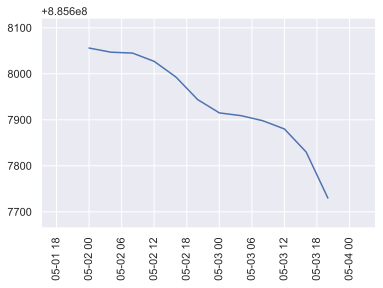

In [203]:
x = mta_dfs[mask].DATETIME.tolist()

label=['2021-05-03 20:00:00','2021-05-03 16:00:00', '2021-05-03 12:00:00', '2021-05-03 08:00:00','2021-05-03 04:00:00', 
      '2021-05-02 20:00:00','2021-05-02 16:00:00', '2021-05-02 12:00:00', '2021-05-02 08:00:00','2021-05-02 04:00:00']
fig = plt.figure(figsize=(6,4));
plt.plot( mta_dfs[mask].DATETIME.tolist(), mta_dfs[mask].ENTRIES.tolist())
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks( rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

-  the counter is working reversely

In [205]:
# confirm the reverse counting ENTRIES in each tunrstile/each day is pulled from the ENTRIES in the earliest record of that day
mask = ((mta_dfs_daily_entries["CA"] == "A011") & 
(mta_dfs_daily_entries["UNIT"] == "R080") & 
(mta_dfs_daily_entries["SCP"] == "01-03-00") & 
(mta_dfs_daily_entries["STATION"] == "57 ST-7 AV") &
(mta_dfs_daily_entries["DATETIME"].dt.date >= datetime.datetime(2021, 5, 2).date()) &
        (mta_dfs_daily_entries["DATETIME"].dt.date <= datetime.datetime(2021, 5, 3).date()))
mta_dfs_daily_entries[mask]

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS
4798,A011,R080,01-03-00,57 ST-7 AV,05/02/2021,885608056,489603887,NQRW,BMT,2021-05-02 20:00:00,05/01/2021,885608240.0,489604774.0
4799,A011,R080,01-03-00,57 ST-7 AV,05/03/2021,885607915,489603188,NQRW,BMT,2021-05-03 20:00:00,05/02/2021,885608056.0,489603887.0


#### check how many entries has this issue

In [206]:
# Let's see how many stations have this problem

(mta_dfs_daily_entries[mta_dfs_daily_entries['ENTRIES'] <mta_dfs_daily_entries['PREV_ENTRIES']]
.groupby(['CA', 'UNIT', 'SCP', 'STATION'])
.count())

DATE  ENTRIES  EXITS  LINENAME  DIVISION  \
CA    UNIT SCP      STATION                                                     
A011  R080 01-03-00 57 ST-7 AV        122      122    122       122       122   
           01-03-04 57 ST-7 AV          1        1      1         1         1   
A013  R081 01-06-01 49 ST               2        2      2         2         2   
A014  R081 02-00-00 49 ST               1        1      1         1         1   
A015  R081 00-00-02 49 ST               1        1      1         1         1   
...                                   ...      ...    ...       ...       ...   
R633  R068 00-00-01 VAN SICLEN AV       1        1      1         1         1   
R646  R110 01-00-02 FLATBUSH AV-B.C     1        1      1         1         1   
R730  R431 00-00-04 EASTCHSTER/DYRE   120      120    120       120       120   
S101  R070 00-00-02 ST. GEORGE          1        1      1         1         1   
TRAM2 R469 00-05-00 RIT-ROOSEVELT       1        1      1         1         1   

                                     DATETIME  PREV_DATE  PREV_ENTRIES  \
CA    UNIT SCP      STATION                                              
A011  R080 01-03-00 57 ST-7 AV            122        122           122   
           01-03-04 57 ST-7 AV              1          1             1   
A013  R081 01-06-01 49 ST                   2          2             2   
A014  R081 02-00-00 49 ST                   1          1             1   
A015  R081 00-00-02 49 ST                   1          1             1   
...                                       ...        ...           ...   
R633  R068 00-00-01 VAN SICLEN AV           1          1             1   
R646  R110 01-00-02 FLATBUSH AV-B.C         1          1             1   
R730  R431 00-00-04 EASTCHSTER/DYRE       120        120           120   
S101  R070 00-00-02 ST. GEORGE              1          1             1   
TRAM2 R469 00-05-00 RIT-ROOSEVELT           1          1             1   

                                     PREV_EXITS  
CA    UNIT SCP      STATION                      
A011  R080 01-03-00 57 ST-7 AV              122  
           01-03-04 57 ST-7 AV                1  
A013  R081 01-06-01 49 ST                     2  
A014  R081 02-00-00 49 ST                     1  
A015  R081 00-00-02 49 ST                     1  
...                                         ...  
R633  R068 00-00-01 VAN SICLEN AV             1  
R646  R110 01-00-02 FLATBUSH AV-B.C           1  
R730  R431 00-00-04 EASTCHSTER/DYRE         120  
S101  R070 00-00-02 ST. GEORGE                1  
TRAM2 R469 00-05-00 RIT-ROOSEVELT             1  

[251 rows x 9 columns]

#### solve issue2
 - use apply function to reverse the reverse counting entries
 - (1) flip the sign for the daily diff entries
 - (2) If the diff is bigger than (max_counter) then take the smaller one if the smaller value is less than max_counter, otherwise, reset to 0
 - max_counter:  In 2020, the subway has daily ridership of approximately 2 million. Times Square-42nd Street station is the busiest station in 2020 and  the average daily ridership of the Times Square-42nd Street station in 2019 was a staggering 178,138. In this analysis, the data entries here is counted every 4 hours in each turnstile; therefore, assume the max_counter as 200,000 for each turnstile per day


 https://new.mta.info/agency/new-york-city-transit/subway-bus-ridership-2020
 https://www.timessquarenyc.org/do-business/market-research-data/transit-ridership
 
 
 

In [207]:
def get_daily_counts(row, max_counter):
    counter = row.ENTRIES - row.PREV_ENTRIES
    if counter < 0: # reverse counting
        counter = -counter
    if counter > max_counter:
        # try to take the min first
        print(f'entries: {row.ENTRIES} <-- {row.PREV_ENTRIES}')
        counter = min(row.ENTRIES, row.PREV_ENTRIES)
    if counter > max_counter: 
        # if still too big , reset to 0 
        return 0 
    
    return counter

In [342]:
def get_daily_exits_counts(row, max_counter):
    counter = row.EXITS - row.PREV_EXITS
    if counter < 0: # reverse counting
        counter = -counter
    if counter > max_counter:
        # try to take the min first
        print(f'entries: {row.EXITS} <-- {row.PREV_EXITS}')
        counter = min(row.EXITS, row.PREV_EXITS)
        
    if counter > max_counter: 
        # if still too big , reset to 0 
        return 0 
    
    return counter

In [208]:
# test1: max_counter=1000000  maxium number of entry into turnstile in a day 
mta_dfs_daily_entries['DAILY_ENTRIES_TEST1'] = mta_dfs_daily_entries.apply(get_daily_counts, axis = 1, max_counter=1000000)

entries: 3109 <-- 1390173.0
entries: 205 <-- 4341004.0
entries: 14 <-- 1028362.0
entries: 327866 <-- 756269765.0
entries: 353 <-- 8049630.0
entries: 0 <-- 5309746.0
entries: 101 <-- 2651127.0
entries: 167790157 <-- 702266.0
entries: 48 <-- 8724126.0
entries: 164 <-- 2627869.0
entries: 460 <-- 1605140.0
entries: 6588 <-- 4298891.0
entries: 0 <-- 117440512.0
entries: 8986986 <-- 29083.0
entries: 29438 <-- 8986986.0
entries: 11310395 <-- 1893566.0
entries: 1894639 <-- 11310395.0
entries: 778 <-- 8883051.0
entries: 328315 <-- 7577112.0
entries: 240 <-- 4780276.0
entries: 67109632 <-- 14.0
entries: 327682 <-- 67109640.0
entries: 15 <-- 67109632.0
entries: 12517611 <-- 82.0
entries: 66 <-- 1198448.0
entries: 916 <-- 5405537.0
entries: 687970551 <-- 19471253.0
entries: 200 <-- 705357551.0
entries: 1076 <-- 7489966.0
entries: 16777220 <-- 1037157.0
entries: 463 <-- 6101664.0
entries: 419 <-- 1657978.0
entries: 6 <-- 16034831.0
entries: 327 <-- 2524852.0
entries: 67436550 <-- 375578.0
entries: 

In [209]:
mta_dfs_daily_entries.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES_TEST1
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,2584647,NQR456W,BMT,2021-05-02 20:00:00,05/01/2021,7564974.0,2584525.0,326.0
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,2584893,NQR456W,BMT,2021-05-03 20:00:00,05/02/2021,7565300.0,2584647.0,498.0
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,2585155,NQR456W,BMT,2021-05-04 20:00:00,05/03/2021,7565798.0,2584893.0,566.0
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,2585432,NQR456W,BMT,2021-05-05 20:00:00,05/04/2021,7566364.0,2585155.0,600.0
5,A002,R051,02-00-00,59 ST,05/06/2021,7567550,2585658,NQR456W,BMT,2021-05-06 20:00:00,05/05/2021,7566964.0,2585432.0,586.0


In [210]:
mta_dfs_daily_entries.DAILY_ENTRIES_TEST1.describe()


count    609185.000000
mean        417.990633
std        4989.067026
min           0.000000
25%          85.000000
50%         263.000000
75%         520.000000
max      992974.000000
Name: DAILY_ENTRIES_TEST1, dtype: float64

 - diff between max and 75% still very big, take a smaller max_counter
 - try a 800000 as maxium numer in for 4 hours of a day per turnstile(since daily average is 2M of riders for 472 subway stations for 24 hours)

In [322]:
# # test2: max_counter=250000, maxium number of entry into turnstile in a day within 4 hours

mta_dfs_daily_entries['DAILY_ENTRIES_TEST2'] = mta_dfs_daily_entries.apply(get_daily_counts, axis = 1, max_counter=250000)

entries: 3109 <-- 1390173.0
entries: 160 <-- 479907.0
entries: 205 <-- 4341004.0
entries: 14 <-- 1028362.0
entries: 182 <-- 765804.0
entries: 327866 <-- 756269765.0
entries: 1132 <-- 328024.0
entries: 27 <-- 262152.0
entries: 353 <-- 8049630.0
entries: 0 <-- 5309746.0
entries: 458752 <-- 24.0
entries: 101 <-- 2651127.0
entries: 8 <-- 458758.0
entries: 167790157 <-- 702266.0
entries: 48 <-- 8724126.0
entries: 901 <-- 659349.0
entries: 393216 <-- 728.0
entries: 327680 <-- 4.0
entries: 1 <-- 327690.0
entries: 164 <-- 2627869.0
entries: 460 <-- 1605140.0
entries: 6588 <-- 4298891.0
entries: 0 <-- 117440512.0
entries: 8986986 <-- 29083.0
entries: 29438 <-- 8986986.0
entries: 11310395 <-- 1893566.0
entries: 1894639 <-- 11310395.0
entries: 990 <-- 367525.0
entries: 778 <-- 8883051.0
entries: 851 <-- 500619.0
entries: 328315 <-- 7577112.0
entries: 240 <-- 4780276.0
entries: 85 <-- 490316.0
entries: 67109632 <-- 14.0
entries: 327682 <-- 67109640.0
entries: 15 <-- 67109632.0
entries: 276 <-- 755

In [323]:
mta_dfs_daily_entries.DAILY_ENTRIES_TEST2.describe()


count    609185.000000
mean        374.197137
std        1501.493657
min           0.000000
25%          85.000000
50%         263.000000
75%         520.000000
max      245608.000000
Name: DAILY_ENTRIES_TEST2, dtype: float64

In [324]:
mta_dfs_daily_entries.describe()

,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_EXITS,DAY_OF_WEEKS,DAILY_ENTRIES,DAILY_ENTRIES_TEST2
count,6.091850e+05,6.091850e+05,6.091850e+05,6.091850e+05,609185.000000,609185.000000,609185.000000,609185.000000
mean,4.157559e+07,3.327161e+07,4.158110e+07,3.327736e+07,417.990633,2.983289,417.990633,374.197137
std,2.181575e+08,1.919791e+08,2.181687e+08,1.920043e+08,4989.067026,2.020460,4989.067026,1501.493657
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.146370e+05,9.621100e+04,2.146020e+05,9.609700e+04,85.000000,1.000000,85.000000,85.000000
50%,1.397484e+06,8.458840e+05,1.397851e+06,8.460400e+05,263.000000,3.000000,263.000000,263.000000
75%,5.996050e+06,3.956563e+06,5.996756e+06,3.956642e+06,520.000000,5.000000,520.000000,520.000000
max,2.147427e+09,2.133797e+09,2.147427e+09,2.133797e+09,992974.000000,6.000000,992974.000000,245608.000000


In [325]:
# Keep Test2 DAILY_ENTRIES_TEST2
mta_dfs_daily_entries = mta_dfs_daily_entries.drop(["DAILY_ENTRIES_TEST1","DAILY_ENTRIES"], axis=1, errors="ignore")
mta_dfs_daily_entries

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_EXITS,DAY_OF_WEEKS,DAILY_ENTRIES_TEST2
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,2584647,NQR456W,BMT,2021-05-02 20:00:00,05/01/2021,7564974.0,2584525.0,326.0,6,326.0
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,2584893,NQR456W,BMT,2021-05-03 20:00:00,05/02/2021,7565300.0,2584647.0,498.0,0,498.0
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,2585155,NQR456W,BMT,2021-05-04 20:00:00,05/03/2021,7565798.0,2584893.0,566.0,1,566.0
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,2585432,NQR456W,BMT,2021-05-05 20:00:00,05/04/2021,7566364.0,2585155.0,600.0,2,600.0
5,A002,R051,02-00-00,59 ST,05/06/2021,7567550,2585658,NQR456W,BMT,2021-05-06 20:00:00,05/05/2021,7566964.0,2585432.0,586.0,3,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614210,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/27/2021,5554,614,R,RIT,2021-08-27 21:00:00,08/26/2021,5554.0,614.0,0.0,4,0.0
614211,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/28/2021,5554,615,R,RIT,2021-08-28 21:00:00,08/27/2021,5554.0,614.0,0.0,5,0.0
614212,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/29/2021,5554,616,R,RIT,2021-08-29 21:00:00,08/28/2021,5554.0,615.0,0.0,6,0.0
614213,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554,616,R,RIT,2021-08-30 21:00:00,08/29/2021,5554.0,616.0,0.0,0,0.0


In [326]:
#-- From the mean , std vs max, use TEST2 for further analysis
mta_dfs_daily_entries.rename(columns={'DAILY_ENTRIES_TEST2': 'DAILY_ENTRIES'}, inplace=True)

In [327]:
mta_dfs_daily_entries.describe()

,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_EXITS,DAY_OF_WEEKS,DAILY_ENTRIES
count,6.091850e+05,6.091850e+05,6.091850e+05,6.091850e+05,609185.000000,609185.000000,609185.000000
mean,4.157559e+07,3.327161e+07,4.158110e+07,3.327736e+07,417.990633,2.983289,374.197137
std,2.181575e+08,1.919791e+08,2.181687e+08,1.920043e+08,4989.067026,2.020460,1501.493657
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,2.146370e+05,9.621100e+04,2.146020e+05,9.609700e+04,85.000000,1.000000,85.000000
50%,1.397484e+06,8.458840e+05,1.397851e+06,8.460400e+05,263.000000,3.000000,263.000000
75%,5.996050e+06,3.956563e+06,5.996756e+06,3.956642e+06,520.000000,5.000000,520.000000
max,2.147427e+09,2.133797e+09,2.147427e+09,2.133797e+09,992974.000000,6.000000,245608.000000


In [328]:
# check the data
mta_dfs_daily_entries[mta_dfs_daily_entries["EXITS"] < mta_dfs_daily_entries["PREV_EXITS"]].head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_EXITS,DAY_OF_WEEKS,DAILY_ENTRIES
4798,A011,R080,01-03-00,57 ST-7 AV,05/02/2021,885608056,489603887,NQRW,BMT,2021-05-02 20:00:00,05/01/2021,885608240.0,489604774.0,184.0,6,184.0
4799,A011,R080,01-03-00,57 ST-7 AV,05/03/2021,885607915,489603188,NQRW,BMT,2021-05-03 20:00:00,05/02/2021,885608056.0,489603887.0,141.0,0,141.0
4800,A011,R080,01-03-00,57 ST-7 AV,05/04/2021,885607682,489602188,NQRW,BMT,2021-05-04 20:00:00,05/03/2021,885607915.0,489603188.0,233.0,1,233.0
4801,A011,R080,01-03-00,57 ST-7 AV,05/05/2021,885607416,489601102,NQRW,BMT,2021-05-05 20:00:00,05/04/2021,885607682.0,489602188.0,266.0,2,266.0
4802,A011,R080,01-03-00,57 ST-7 AV,05/06/2021,885607137,489599967,NQRW,BMT,2021-05-06 20:00:00,05/05/2021,885607416.0,489601102.0,279.0,3,279.0


In [329]:
mask = ((mta_dfs["CA"] == "A011") & 
(mta_dfs["UNIT"] == "R080") & 
(mta_dfs["SCP"] == "01-03-00") & 
(mta_dfs["STATION"] == "57 ST-7 AV") &
(mta_dfs["DATETIME"].dt.date >= datetime.datetime(2021, 5, 2).date()) &
        (mta_dfs["DATETIME"].dt.date <= datetime.datetime(2021, 5, 3).date()))
mta_dfs[mask]

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME
3471907,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,20:00:00,885607730,489602256,2021-05-03 20:00:00
3471906,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,16:00:00,885607830,489602429,2021-05-03 16:00:00
3471905,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,12:00:00,885607880,489602629,2021-05-03 12:00:00
3471904,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,08:00:00,885607898,489602994,2021-05-03 08:00:00
3471903,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,04:00:00,885607909,489603183,2021-05-03 04:00:00
3471902,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/03/2021,00:00:00,885607915,489603188,2021-05-03 00:00:00
3471901,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/02/2021,20:00:00,885607944,489603265,2021-05-02 20:00:00
3471900,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/02/2021,16:00:00,885607993,489603421,2021-05-02 16:00:00
3471899,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/02/2021,12:00:00,885608027,489603627,2021-05-02 12:00:00
3471898,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/02/2021,08:00:00,885608045,489603794,2021-05-02 08:00:00


In [330]:
# Let's see how many stations have this problem

(mta_dfs_daily_entries[mta_dfs_daily_entries['EXITS'] <mta_dfs_daily_entries['PREV_EXITS']]
.groupby(['CA', 'UNIT', 'SCP', 'STATION'])
.count())

DATE  ENTRIES  EXITS  LINENAME  DIVISION  \
CA    UNIT SCP      STATION                                                     
A011  R080 01-03-00 57 ST-7 AV        122      122    122       122       122   
           01-03-04 57 ST-7 AV          1        1      1         1         1   
A013  R081 01-06-01 49 ST               2        2      2         2         2   
A014  R081 02-00-00 49 ST               1        1      1         1         1   
A015  R081 00-00-02 49 ST               1        1      1         1         1   
...                                   ...      ...    ...       ...       ...   
R633  R068 00-00-01 VAN SICLEN AV       1        1      1         1         1   
R646  R110 01-00-02 FLATBUSH AV-B.C     1        1      1         1         1   
R728  R226 00-05-01 GUN HILL RD         1        1      1         1         1   
S101  R070 00-00-02 ST. GEORGE          1        1      1         1         1   
TRAM2 R469 00-05-00 RIT-ROOSEVELT       2        2      2         2         2   

                                     DATETIME  PREV_DATE  PREV_ENTRIES  \
CA    UNIT SCP      STATION                                              
A011  R080 01-03-00 57 ST-7 AV            122        122           122   
           01-03-04 57 ST-7 AV              1          1             1   
A013  R081 01-06-01 49 ST                   2          2             2   
A014  R081 02-00-00 49 ST                   1          1             1   
A015  R081 00-00-02 49 ST                   1          1             1   
...                                       ...        ...           ...   
R633  R068 00-00-01 VAN SICLEN AV           1          1             1   
R646  R110 01-00-02 FLATBUSH AV-B.C         1          1             1   
R728  R226 00-05-01 GUN HILL RD             1          1             1   
S101  R070 00-00-02 ST. GEORGE              1          1             1   
TRAM2 R469 00-05-00 RIT-ROOSEVELT           2          2             2   

                                     PREV_EXITS  DAILY_EXITS  DAY_OF_WEEKS  \
CA    UNIT SCP      STATION                                                  
A011  R080 01-03-00 57 ST-7 AV              122          122           122   
           01-03-04 57 ST-7 AV                1            1             1   
A013  R081 01-06-01 49 ST                     2            2             2   
A014  R081 02-00-00 49 ST                     1            1             1   
A015  R081 00-00-02 49 ST                     1            1             1   
...                                         ...          ...           ...   
R633  R068 00-00-01 VAN SICLEN AV             1            1             1   
R646  R110 01-00-02 FLATBUSH AV-B.C           1            1             1   
R728  R226 00-05-01 GUN HILL RD               1            1             1   
S101  R070 00-00-02 ST. GEORGE                1            1             1   
TRAM2 R469 00-05-00 RIT-ROOSEVELT             2            2             2   

                                     DAILY_ENTRIES  
CA    UNIT SCP      STATION                         
A011  R080 01-03-00 57 ST-7 AV                 122  
           01-03-04 57 ST-7 AV                   1  
A013  R081 01-06-01 49 ST                        2  
A014  R081 02-00-00 49 ST                        1  
A015  R081 00-00-02 49 ST                        1  
...                                            ...  
R633  R068 00-00-01 VAN SICLEN AV                1  
R646  R110 01-00-02 FLATBUSH AV-B.C              1  
R728  R226 00-05-01 GUN HILL RD                  1  
S101  R070 00-00-02 ST. GEORGE                   1  
TRAM2 R469 00-05-00 RIT-ROOSEVELT                2  

[235 rows x 12 columns]

In [350]:
mta_dfs_daily_entries['DAILY_EXITS'] = mta_dfs_daily_entries.apply(get_daily_exits_counts, axis = 1, max_counter=250000)

entries: 540 <-- 995824.0
entries: 69 <-- 808418.0
entries: 15 <-- 538441.0
entries: 561 <-- 1653840.0
entries: 304 <-- 436767843.0
entries: 165 <-- 2357391.0
entries: 0 <-- 3196184.0
entries: 137 <-- 2192493.0
entries: 268473848 <-- 1083083.0
entries: 65 <-- 8512839.0
entries: 602 <-- 1025567.0
entries: 676 <-- 274285.0
entries: 245 <-- 2944261.0
entries: 262 <-- 561847.0
entries: 4013 <-- 494213.0
entries: 11186662 <-- 73496.0
entries: 74398 <-- 11186662.0
entries: 10489132 <-- 49160.0
entries: 49563 <-- 10489132.0
entries: 3487 <-- 1152627.0
entries: 95 <-- 751600.0
entries: 14484466 <-- 852978.0
entries: 853081 <-- 14484466.0
entries: 800988285 <-- 4318079.0
entries: 4318302 <-- 800988285.0
entries: 2133796536 <-- 55608.0
entries: 55645 <-- 2133796536.0
entries: 852 <-- 477315.0
entries: 211 <-- 2004698.0
entries: 288 <-- 8071018.0
entries: 168 <-- 319261.0
entries: 14090596 <-- 149.0
entries: 228 <-- 1502424.0
entries: 510 <-- 1852012.0
entries: 1174467683 <-- 4611970.0
entries: 4

In [351]:
mta_dfs_daily_entries['DAY_OF_WEEKS'] = mta_dfs_daily_entries.DATETIME.dt.weekday

In [352]:
mta_dfs_daily_entries.head(5)

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_EXITS,DAY_OF_WEEKS,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,2584647,NQR456W,BMT,2021-05-02 20:00:00,05/01/2021,7564974.0,2584525.0,122.0,6,326.0
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,2584893,NQR456W,BMT,2021-05-03 20:00:00,05/02/2021,7565300.0,2584647.0,246.0,0,498.0
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,2585155,NQR456W,BMT,2021-05-04 20:00:00,05/03/2021,7565798.0,2584893.0,262.0,1,566.0
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,2585432,NQR456W,BMT,2021-05-05 20:00:00,05/04/2021,7566364.0,2585155.0,277.0,2,600.0
5,A002,R051,02-00-00,59 ST,05/06/2021,7567550,2585658,NQR456W,BMT,2021-05-06 20:00:00,05/05/2021,7566964.0,2585432.0,226.0,3,586.0


In [353]:
#get weekend data for analysis

mask = ( (mta_dfs_daily_entries['DAY_OF_WEEKS']==5) | (mta_dfs_daily_entries['DAY_OF_WEEKS']==6))

mta_dfs_weekend_entries = mta_dfs_daily_entries[mask].copy()

mta_dfs_weekend_entries.head(5)

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_EXITS,DAY_OF_WEEKS,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,2584647,NQR456W,BMT,2021-05-02 20:00:00,05/01/2021,7564974.0,2584525.0,122.0,6,326.0
7,A002,R051,02-00-00,59 ST,05/08/2021,7568516,2585969,NQR456W,BMT,2021-05-08 20:00:00,05/07/2021,7568106.0,2585842.0,127.0,5,410.0
8,A002,R051,02-00-00,59 ST,05/09/2021,7568840,2586097,NQR456W,BMT,2021-05-09 20:00:00,05/08/2021,7568516.0,2585969.0,128.0,6,324.0
14,A002,R051,02-00-00,59 ST,05/15/2021,7572186,2587583,NQR456W,BMT,2021-05-15 20:00:00,05/14/2021,7571785.0,2587459.0,124.0,5,401.0
15,A002,R051,02-00-00,59 ST,05/16/2021,7572532,2587702,NQR456W,BMT,2021-05-16 20:00:00,05/15/2021,7572186.0,2587583.0,119.0,6,346.0


In [354]:
#get weekday data for analysis

mask = ((mta_dfs_daily_entries['DAY_OF_WEEKS']>=0) & (mta_dfs_daily_entries['DAY_OF_WEEKS'] < 5))

mta_dfs_weekday_entries = mta_dfs_daily_entries[mask].copy()

mta_dfs_weekday_entries.head(5)

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_EXITS,DAY_OF_WEEKS,DAILY_ENTRIES
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,2584893,NQR456W,BMT,2021-05-03 20:00:00,05/02/2021,7565300.0,2584647.0,246.0,0,498.0
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,2585155,NQR456W,BMT,2021-05-04 20:00:00,05/03/2021,7565798.0,2584893.0,262.0,1,566.0
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,2585432,NQR456W,BMT,2021-05-05 20:00:00,05/04/2021,7566364.0,2585155.0,277.0,2,600.0
5,A002,R051,02-00-00,59 ST,05/06/2021,7567550,2585658,NQR456W,BMT,2021-05-06 20:00:00,05/05/2021,7566964.0,2585432.0,226.0,3,586.0
6,A002,R051,02-00-00,59 ST,05/07/2021,7568106,2585842,NQR456W,BMT,2021-05-07 20:00:00,05/06/2021,7567550.0,2585658.0,184.0,4,556.0


### Analysis1: each ControlArea/UNIT/STATION combo, for each day
#### 1 Summary data (Daily)
- For each ControlArea/UNIT/STATION combo, for each day, sum the counts from each turnstile belonging to that combo. (hint: pd.groupby) - some  ControlArea/UNIT/STATION  has multiple turnstiles; some has only one

In [365]:
ca_unit_station_daily = mta_dfs_daily_entries.groupby(['CA','UNIT', 'STATION','DATE'])\
                    [['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index()

In [366]:
ca_unit_station_daily.head()

,CA,UNIT,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
0,A002,R051,59 ST,05/02/2021,2590.0,1875.0
1,A002,R051,59 ST,05/03/2021,4379.0,3660.0
2,A002,R051,59 ST,05/04/2021,4890.0,3862.0
3,A002,R051,59 ST,05/05/2021,4847.0,3866.0
4,A002,R051,59 ST,05/06/2021,5068.0,3905.0


In [357]:
ca_unit_station_daily.reset_index().sort_values("DAILY_ENTRIES", ascending=False).head(10)

,index,CA,UNIT,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
56070,56070,PTH22,R540,PATH NEW WTC,05/06/2021,661868.0,688163.0
56147,56147,PTH22,R540,PATH NEW WTC,07/22/2021,291752.0,453698.0
54279,54279,PTH04,R551,GROVE STREET,06/14/2021,251715.0,87754.0
54278,54278,PTH04,R551,GROVE STREET,06/13/2021,250845.0,87702.0
54213,54213,PTH03,R552,JOURNAL SQUARE,08/09/2021,249251.0,48315.0
56115,56115,PTH22,R540,PATH NEW WTC,06/20/2021,243981.0,225666.0
84540,84540,R526,R096,82 ST-JACKSON H,06/30/2021,223961.0,12499.0
60760,60760,R138,R293,34 ST-PENN STA,06/29/2021,209288.0,15464.0
56151,56151,PTH22,R540,PATH NEW WTC,07/26/2021,202682.0,151804.0
60693,60693,R137,R031,34 ST-PENN STA,08/23/2021,201362.0,4.0


#### 1.1 Weekday data
- For each ControlArea/UNIT/STATION combo for weekday 

In [368]:
ca_unit_station_weekday = mta_dfs_weekday_entries.groupby(['CA','UNIT', 'STATION', 'DATE']) [['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index()
ca_unit_station_weekday.reset_index().sort_values("DAILY_ENTRIES", ascending=False).head(10)

,index,CA,UNIT,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
39982,39982,PTH22,R540,PATH NEW WTC,05/06/2021,661868.0,688163.0
40037,40037,PTH22,R540,PATH NEW WTC,07/22/2021,291752.0,453698.0
38704,38704,PTH04,R551,GROVE STREET,06/14/2021,251715.0,87754.0
38657,38657,PTH03,R552,JOURNAL SQUARE,08/09/2021,249251.0,48315.0
60281,60281,R526,R096,82 ST-JACKSON H,06/30/2021,223961.0,12499.0
43326,43326,R138,R293,34 ST-PENN STA,06/29/2021,209288.0,15464.0
40039,40039,PTH22,R540,PATH NEW WTC,07/26/2021,202682.0,151804.0
43278,43278,R137,R031,34 ST-PENN STA,08/23/2021,201362.0,4.0
52118,52118,R261,R205,149/GRAND CONC,07/08/2021,200589.0,5374.0
11081,11081,H007A,R248,1 AV,06/16/2021,200573.0,5903.0


#### 1.2 Weekend data
- For each ControlArea/UNIT/STATION combo for weekend
- sum the counts from each turnstile belonging to that combo. (hint: pd.groupby) - some  ControlArea/UNIT/STATION  has multiple turnstiles; some has only one

In [371]:
ca_unit_station_weekend = mta_dfs_weekend_entries.groupby(['CA','UNIT', 'STATION', 'DATE']) [['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index()
ca_unit_station_weekend.reset_index().sort_values("DAILY_ENTRIES", ascending=False).head(10)

,index,CA,UNIT,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
15574,15574,PTH04,R551,GROVE STREET,06/13/2021,250845.0,87702.0
16101,16101,PTH22,R540,PATH NEW WTC,06/20/2021,243981.0,225666.0
26096,26096,S101,R070,ST. GEORGE,08/29/2021,183422.0,184.0
26095,26095,S101,R070,ST. GEORGE,08/28/2021,183387.0,184.0
8193,8193,N080,R138,W 4 ST-WASH SQ,05/29/2021,160037.0,27235.0
6225,6225,JFK03,R536,JFK JAMAICA CT1,08/29/2021,151596.0,5200.0
16108,16108,PTH22,R540,PATH NEW WTC,07/17/2021,129869.0,203203.0
16106,16106,PTH22,R540,PATH NEW WTC,07/10/2021,93973.0,38502.0
6224,6224,JFK03,R536,JFK JAMAICA CT1,08/28/2021,93319.0,4423.0
15540,15540,PTH03,R552,JOURNAL SQUARE,06/19/2021,85294.0,119453.0


### Analysis2: daily entries for all the turnstiles in each station
#### 2 Summary data (Daily)
-  Daily time series for each STATION, by adding up the daily entries for all the turnstiles in each station.some has only one

In [372]:
station_daily = mta_dfs_daily_entries.groupby(["STATION", "DATE"])[['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index()
station_daily.sort_values("DAILY_ENTRIES", ascending = False).head(10)

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
38385,PATH NEW WTC,05/06/2021,661868.0,688163.0
38462,PATH NEW WTC,07/22/2021,291752.0,453698.0
28703,GROVE STREET,06/14/2021,251715.0,87754.0
28702,GROVE STREET,06/13/2021,250845.0,87702.0
31565,JOURNAL SQUARE,08/09/2021,249251.0,48315.0
7553,34 ST-PENN STA,08/23/2021,246791.0,58623.0
7498,34 ST-PENN STA,06/29/2021,244953.0,64742.0
38430,PATH NEW WTC,06/20/2021,243981.0,225666.0
13230,82 ST-JACKSON H,06/30/2021,223961.0,12499.0
45501,WOODHAVEN BLVD,06/18/2021,208866.0,12290.0


#### 2.1 Weekday data
- For each STATION combo for weekday 

In [373]:
station_weekday = mta_dfs_weekday_entries.groupby(["STATION", "DATE"])[['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index()
station_weekday.sort_values("DAILY_ENTRIES", ascending = False).head(10)

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
27368,PATH NEW WTC,05/06/2021,661868.0,688163.0
27423,PATH NEW WTC,07/22/2021,291752.0,453698.0
20465,GROVE STREET,06/14/2021,251715.0,87754.0
22506,JOURNAL SQUARE,08/09/2021,249251.0,48315.0
5385,34 ST-PENN STA,08/23/2021,246791.0,58623.0
5346,34 ST-PENN STA,06/29/2021,244953.0,64742.0
9433,82 ST-JACKSON H,06/30/2021,223961.0,12499.0
32442,WOODHAVEN BLVD,06/18/2021,208866.0,12290.0
32,1 AV,06/16/2021,204930.0,13905.0
27425,PATH NEW WTC,07/26/2021,202682.0,151804.0


#### 2.2 Weekend data
- Weekend time series for each STATIO
- adding up the daily entries for all the turnstiles in each station

In [374]:
station_weekend = mta_dfs_weekend_entries.groupby(["STATION", "DATE"])[['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index()
station_weekend.sort_values("DAILY_ENTRIES", ascending = False).head(10)

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
8237,GROVE STREET,06/13/2021,250845.0,87702.0
11030,PATH NEW WTC,06/20/2021,243981.0,225666.0
12065,ST. GEORGE,08/29/2021,184293.0,184.0
12064,ST. GEORGE,08/28/2021,184188.0,184.0
12703,W 4 ST-WASH SQ,05/29/2021,165821.0,37126.0
8994,JFK JAMAICA CT1,08/29/2021,151596.0,5200.0
11037,PATH NEW WTC,07/17/2021,129869.0,203203.0
11035,PATH NEW WTC,07/10/2021,93973.0,38502.0
8993,JFK JAMAICA CT1,08/28/2021,93319.0,4423.0
9043,JOURNAL SQUARE,06/19/2021,85294.0,119453.0


#### Analysis3: total ridership for each station  from 05-01-2021 to 08-31-2021
#### Summary data (Daily)
- sum the total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time we've captured.

In [433]:
stations_daily_totals = station_daily.groupby('STATION')[['DAILY_ENTRIES','DAILY_EXITS']].sum().\
                reset_index().sort_values('DAILY_ENTRIES', ascending=False)
stations_daily_totals.head(10)

,STATION,DAILY_ENTRIES,DAILY_EXITS
61,34 ST-PENN STA,5640266.0,7138546.0
315,PATH NEW WTC,4247677.0,4596729.0
59,34 ST-HERALD SQ,4019117.0,5305040.0
233,GRD CNTRL-42 ST,3696735.0,5256036.0
68,42 ST-PORT AUTH,3511165.0,4410245.0
110,86 ST,3483518.0,4715738.0
46,23 ST,3396799.0,3926125.0
9,125 ST,3324501.0,4107461.0
14,14 ST-UNION SQ,3237302.0,4591511.0
353,TIMES SQ-42 ST,2850442.0,3871829.0


#### 3.1 Weekday data
- Total rides for each STATION , list the top 10 total rides on the weekday 

In [434]:
stations_weekday_totals = station_weekday.groupby('STATION')[['DAILY_ENTRIES','DAILY_EXITS']].sum().\
                reset_index().sort_values('DAILY_ENTRIES', ascending=False)
stations_weekday_totals.head(10)

,STATION,DAILY_ENTRIES,DAILY_EXITS
61,34 ST-PENN STA,4589379.0,5597838.0
315,PATH NEW WTC,3364464.0,3701044.0
59,34 ST-HERALD SQ,3160182.0,4147811.0
233,GRD CNTRL-42 ST,3023835.0,4229304.0
110,86 ST,2821408.0,3671353.0
68,42 ST-PORT AUTH,2743734.0,3443473.0
46,23 ST,2726231.0,3140202.0
9,125 ST,2643050.0,3188758.0
14,14 ST-UNION SQ,2483850.0,3455207.0
226,FULTON ST,2219679.0,2864647.0


In [435]:
stations_weekday_totals['TOTAL_RIDERS'] = stations_weekday_totals['DAILY_ENTRIES'] + stations_weekday_totals['DAILY_EXITS']
stations_weekday_totals = stations_weekday_totals.sort_values('TOTAL_RIDERS', ascending=False)
stations_weekday_totals.head(10)

,STATION,DAILY_ENTRIES,DAILY_EXITS,TOTAL_RIDERS
61,34 ST-PENN STA,4589379.0,5597838.0,10187217.0
59,34 ST-HERALD SQ,3160182.0,4147811.0,7307993.0
233,GRD CNTRL-42 ST,3023835.0,4229304.0,7253139.0
315,PATH NEW WTC,3364464.0,3701044.0,7065508.0
110,86 ST,2821408.0,3671353.0,6492761.0
68,42 ST-PORT AUTH,2743734.0,3443473.0,6187207.0
14,14 ST-UNION SQ,2483850.0,3455207.0,5939057.0
46,23 ST,2726231.0,3140202.0,5866433.0
9,125 ST,2643050.0,3188758.0,5831808.0
353,TIMES SQ-42 ST,2194931.0,2907301.0,5102232.0


#### 3.2 Weekend data
- Total rides for each STATION , list the top 10 total rides on the weekend

In [436]:
stations_weekend_totals = station_weekend.groupby('STATION')[['DAILY_ENTRIES','DAILY_EXITS']].sum().\
                reset_index().sort_values('DAILY_ENTRIES', ascending=False)
stations_weekend_totals.head(10)

,STATION,DAILY_ENTRIES,DAILY_EXITS
61,34 ST-PENN STA,1050887.0,1540708.0
315,PATH NEW WTC,883213.0,895685.0
59,34 ST-HERALD SQ,858935.0,1157229.0
68,42 ST-PORT AUTH,767431.0,966772.0
14,14 ST-UNION SQ,753452.0,1136304.0
9,125 ST,681451.0,918703.0
233,GRD CNTRL-42 ST,672900.0,1026732.0
46,23 ST,670568.0,785923.0
110,86 ST,662110.0,1044385.0
353,TIMES SQ-42 ST,655511.0,964528.0


In [437]:
stations_weekend_totals['TOTAL_RIDERS'] = stations_weekend_totals['DAILY_ENTRIES'] + stations_weekend_totals['DAILY_EXITS']
stations_weekend_totals = stations_weekend_totals.sort_values('TOTAL_RIDERS', ascending=False)
stations_weekend_totals.head(10)

,STATION,DAILY_ENTRIES,DAILY_EXITS,TOTAL_RIDERS
61,34 ST-PENN STA,1050887.0,1540708.0,2591595.0
59,34 ST-HERALD SQ,858935.0,1157229.0,2016164.0
14,14 ST-UNION SQ,753452.0,1136304.0,1889756.0
315,PATH NEW WTC,883213.0,895685.0,1778898.0
68,42 ST-PORT AUTH,767431.0,966772.0,1734203.0
110,86 ST,662110.0,1044385.0,1706495.0
233,GRD CNTRL-42 ST,672900.0,1026732.0,1699632.0
353,TIMES SQ-42 ST,655511.0,964528.0,1620039.0
9,125 ST,681451.0,918703.0,1600154.0
46,23 ST,670568.0,785923.0,1456491.0


In [438]:
daily_topN_stations = stations_daily_totals['STATION'].copy().tolist()

In [439]:
weekday_topN_stations = stations_weekday_totals['STATION'].copy().tolist()

In [440]:
weekend_topN_stations = stations_weekend_totals['STATION'].copy().tolist()

In [441]:
set(weekday_topN_stations) ^ set(weekend_topN_stations)

set()

In [442]:
total_stations = set(weekday_topN_stations).union(set(weekend_topN_stations))
len(busy_stations)

379

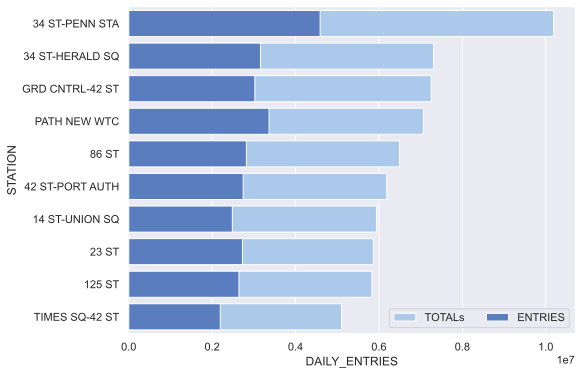

In [445]:
f, ax = plt.subplots(figsize = (8,6))
sns.set_color_codes('pastel')
sns.barplot(x = 'TOTAL_RIDERS', y = 'STATION', data = stations_weekday_totals.head(10),
            label = 'TOTALs', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = 'DAILY_ENTRIES', y = 'STATION', data = stations_weekday_totals.head(10),
            label = 'ENTRIES', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.show()

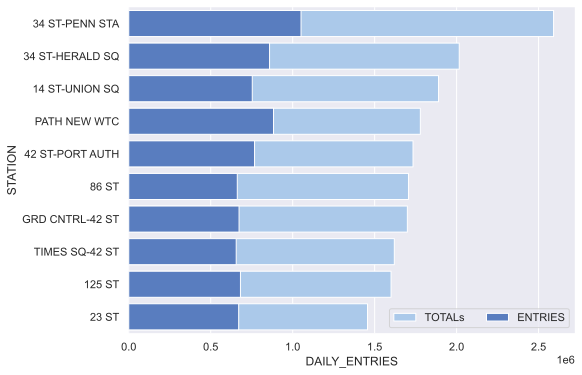

In [444]:
f, ax = plt.subplots(figsize = (8,6))
sns.set_color_codes('pastel')
sns.barplot(x = 'TOTAL_RIDERS', y = 'STATION', data = stations_weekend_totals.head(10),
            label = 'TOTALs', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = 'DAILY_ENTRIES', y = 'STATION', data = stations_weekend_totals.head(10),
            label = 'ENTRIES', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.show()

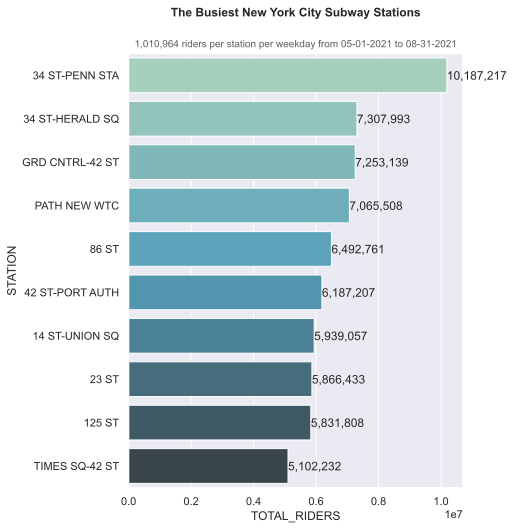

In [448]:

#weekday
sns.set(rc={"figure.figsize":(6,8)})
ax = sns.barplot(y="STATION",x="TOTAL_RIDERS", data=stations_weekday_totals.head(10),palette="GnBu_d")

ax.text(x=0.5, y=1.08, s='The Busiest New York City Subway Stations', fontsize=12, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.035, s='{:,.0f} total riders per weekday from 05-01-2021 to 08-31-2021'.format(int(stations_weekday_totals.TOTAL_RIDERS.sum())), fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.010, s='{:,.0f} riders per station per weekday from 05-01-2021 to 08-31-2021'.format(int(stations_weekday_totals.TOTAL_RIDERS.mean())), fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)


initialx=0
for p in ax.patches:
    ax.text(p.get_width(), initialx+p.get_height()/8,"{:,.0f}".format(p.get_width()))
    initialx+=1


plt.show()



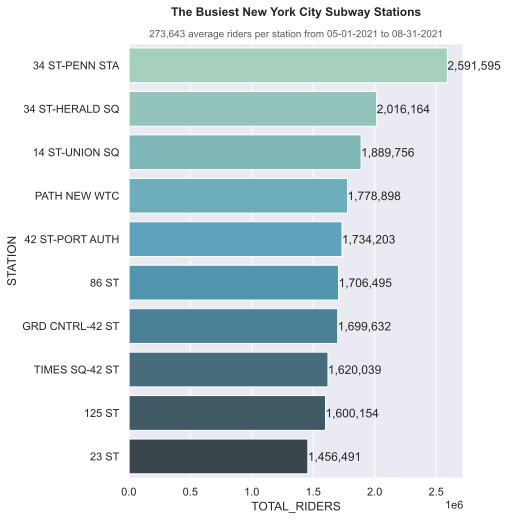

In [449]:
#weekday data
sns.set(rc={"figure.figsize":(6,8)})
ax = sns.barplot(y="STATION",x="TOTAL_RIDERS", data=stations_weekend_totals.head(10),palette="GnBu_d")



ax.text(x=0.5, y=1.058, s='The Busiest New York City Subway Stations', fontsize=12, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.035, s='{:,.0f} total riders per weekend from 05-01-2021 to 08-31-2021'.format(int(stations_weekend_totals.TOTAL_RIDERS.sum())), fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.010, s='{:,.0f} average riders per station from 05-01-2021 to 08-31-2021'.format(int(stations_weekend_totals.TOTAL_RIDERS.mean())), fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)


initialx=0
for p in ax.patches:
    ax.text(p.get_width(), initialx+p.get_height()/8,"{:,.0f}".format(p.get_width()))
    initialx+=1


plt.show()


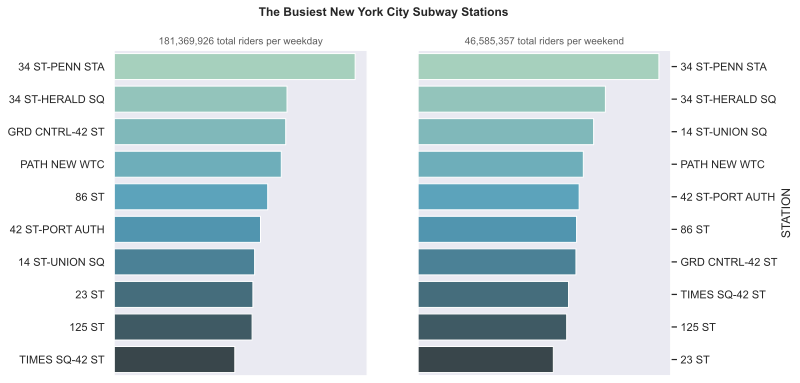

In [450]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
fig.suptitle('The Busiest New York City Subway Stations', fontsize=12, weight='bold')

# WeekdayNone
fig = sns.barplot(ax=axes[0], x="TOTAL_RIDERS", y="STATION", data=stations_weekday_totals.sort_values('TOTAL_RIDERS', ascending=False).head(10), palette="GnBu_d")
axes[0].set_title('{:,.0f} total riders per weekday'.\
                  format(int(stations_weekday_totals.DAILY_ENTRIES.sum())), fontsize=10, alpha=0.75)
axes[0].set(xlabel='WEEKDAY DAILY ENTRIES', ylabel='')

axes[0].get_xaxis().set_visible(False)
axes[0].grid(False)
# Weekend
sns.barplot(ax=axes[1].twinx(), x="TOTAL_RIDERS", y="STATION", data=stations_weekend_totals.sort_values('TOTAL_RIDERS', ascending=False).head(10),palette="GnBu_d")
axes[1].set(xlabel='WEEKEND DAILY ENTRIES',ylabel='')

axes[1].set_title('{:,.0f} total riders per weekend'.\
                  format(int(stations_weekend_totals.DAILY_ENTRIES.sum())), fontsize=10, alpha=0.75)
    
axes[1].get_xaxis().set_visible(False)
axes[1].grid(False)
axes[1].yaxis.set_ticks_position('none') 

plt.savefig('Busiest_New_York_City_Subway.png')

### 3. analysis result visulization

Plot the daily time series for a station.

In [247]:
station_daily_34_st_penn = station_daily[station_daily['STATION'] == '34 ST-PENN STA'].copy()
station_daily_34_st_penn.head()

,STATION,DATE,DAILY_ENTRIES
7440,34 ST-PENN STA,05/02/2021,20537.0
7441,34 ST-PENN STA,05/03/2021,38133.0
7442,34 ST-PENN STA,05/04/2021,38934.0
7443,34 ST-PENN STA,05/05/2021,38934.0
7444,34 ST-PENN STA,05/06/2021,39048.0


In [248]:
station_daily_34_st_heard = station_daily[station_daily['STATION'] == '34 ST-HERALD SQ'].copy()
station_daily_GRD_CTR_42 = station_daily[station_daily['STATION'] == 'GRD CNTRL-42 ST'].copy()
station_daily_86_ST = station_daily[station_daily['STATION'] == '86 ST'].copy()
station_daily_42_ST = station_daily[station_daily['STATION'] == '42 ST-PORT AUTH'].copy()
station_daily_14_ST_UNIONSQ = station_daily[station_daily['STATION'] == '14 ST-UNION SQ'].copy()
station_daily_125_ST = station_daily[station_daily['STATION'] == '125 ST'].copy()


In [249]:
def get_topN_data(busiest_stations_list):
    dfs = []
    for station in busiest_stations_list:
        dfs.append(station_daily[station_daily['STATION'] == station].copy())
    return pd.concat(dfs)


top10_stations_daily_df = get_topN_data(list(set(weekday_topN_stations[:10]).union(set(weekend_topN_stations[:10]))))


In [250]:
top10_stations_daily_df = get_topN_data(list(set(weekday_topN_stations[:10]).union(set(weekend_topN_stations[:10]))))
top5_stations_daily_df = get_topN_data(list(set(weekday_topN_stations[:5]).union(set(weekend_topN_stations[:5]))))


In [251]:
top10_stations_daily_df.DATE = pd.to_datetime(top10_stations_daily_df.DATE)
top5_stations_daily_df.DATE = pd.to_datetime(top5_stations_daily_df.DATE)

In [252]:
#sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

import plotly.express as px

# Without transparency
px.line(data_frame=top10_stations_daily_df, x=top10_stations_daily_df.DATE , y= top10_stations_daily_df.DAILY_ENTRIES, color="STATION" )

In [1151]:

# Without transparency
px.line(data_frame=top5_stations_daily_df, x=top5_stations_daily_df.DATE , y= top5_stations_daily_df.DAILY_ENTRIES, color="STATION" )

In [1152]:
# from matplotlib.dates import MONDAY
# # every monday
# mondays = mdates.WeekdayLocator(MONDAY)

# fig = plt.figure(figsize=(10,4));
# ax = fig.add_subplot(1,1,1)  

# ax.xaxis.set_major_locator(mondays)
# plt.plot(station_daily_34_st_penn['DATE'], station_daily_34_st_penn['DAILY_ENTRIES'])
# plt.plot(station_daily_GRD_CTR_42['DATE'], station_daily_GRD_CTR_42['DAILY_ENTRIES'])
# plt.plot(station_daily_86_ST['DATE'], station_daily_86_ST['DAILY_ENTRIES'])
# plt.plot(station_daily_42_ST['DATE'], station_daily_42_ST['DAILY_ENTRIES'])
# plt.plot(station_daily_14_ST_UNIONSQ['DATE'], station_daily_14_ST_UNIONSQ['DAILY_ENTRIES'])
# plt.plot(station_daily_125_ST['DATE'], station_daily_125_ST['DAILY_ENTRIES'])



# plt.ylabel('# of Entries')
# plt.xlabel('Date (Mondays)')
# plt.xticks(rotation=45)
# plt.title('34 ST-PENN STA Station');
# plt.grid(False)
# plt.legend(["34 ST-HERALD SQ", "GRD CNTRL-42 ST", "86 ST", "'42 ST-PORT AUTH", "14 ST-UNION SQ", "125 ST"])
# plt.show()

Make a list of counts for one week for one station: Monday's count, Tuesday's count, etc., so it's a list of 7 counts. Make the same list for all weeks available.

plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

In [366]:
station_daily_34_st_penn['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_34_st_penn['DATE']).dt.dayofweek
station_daily_34_st_penn['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_34_st_penn['DATE']).dt.isocalendar().week
station_daily_34_st_penn.head()

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
7440,34 ST-PENN STA,05/02/2021,20537.0,6,17
7441,34 ST-PENN STA,05/03/2021,38133.0,0,18
7442,34 ST-PENN STA,05/04/2021,38934.0,1,18
7443,34 ST-PENN STA,05/05/2021,38934.0,2,18
7444,34 ST-PENN STA,05/06/2021,39048.0,3,18


In [361]:
station_daily_34_st_penn

,STATION,DATE,DAILY_ENTRIES
7440,34 ST-PENN STA,05/02/2021,20537.0
7441,34 ST-PENN STA,05/03/2021,38133.0
7442,34 ST-PENN STA,05/04/2021,38934.0
7443,34 ST-PENN STA,05/05/2021,38934.0
7444,34 ST-PENN STA,05/06/2021,39048.0
...,...,...,...
7557,34 ST-PENN STA,08/27/2021,45901.0
7558,34 ST-PENN STA,08/28/2021,29131.0
7559,34 ST-PENN STA,08/29/2021,27651.0
7560,34 ST-PENN STA,08/30/2021,46374.0


In [365]:
mta_dfs_daily_entries.head(10)

,CA,UNIT,SCP,STATION,DATE,ENTRIES,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,DAY_OF_WEEKS,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,NQR456W,BMT,2021-05-02 20:00:00,05/01/2021,7564974.0,6,326.0
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,NQR456W,BMT,2021-05-03 20:00:00,05/02/2021,7565300.0,0,498.0
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,NQR456W,BMT,2021-05-04 20:00:00,05/03/2021,7565798.0,1,566.0
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,NQR456W,BMT,2021-05-05 20:00:00,05/04/2021,7566364.0,2,600.0
5,A002,R051,02-00-00,59 ST,05/06/2021,7567550,NQR456W,BMT,2021-05-06 20:00:00,05/05/2021,7566964.0,3,586.0
6,A002,R051,02-00-00,59 ST,05/07/2021,7568106,NQR456W,BMT,2021-05-07 20:00:00,05/06/2021,7567550.0,4,556.0
7,A002,R051,02-00-00,59 ST,05/08/2021,7568516,NQR456W,BMT,2021-05-08 20:00:00,05/07/2021,7568106.0,5,410.0
8,A002,R051,02-00-00,59 ST,05/09/2021,7568840,NQR456W,BMT,2021-05-09 20:00:00,05/08/2021,7568516.0,6,324.0
9,A002,R051,02-00-00,59 ST,05/10/2021,7569369,NQR456W,BMT,2021-05-10 20:00:00,05/09/2021,7568840.0,0,529.0
10,A002,R051,02-00-00,59 ST,05/11/2021,7570014,NQR456W,BMT,2021-05-11 20:00:00,05/10/2021,7569369.0,1,645.0
